# **Nutritional & Carbon Footprint Data of Indian Diet**



✅ **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

✅ **Step 2: Configuration for better visuals**

In [56]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 4)

✅ **Step 3: Load Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving nutrition_cf - Sheet5.csv to nutrition_cf - Sheet5.csv


In [6]:
df = pd.read_csv("nutrition_cf - Sheet5.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Food                       753 non-null    object 
 1   Associativity              753 non-null    object 
 2   Region                     753 non-null    object 
 3   Type                       753 non-null    object 
 4   Category                   753 non-null    object 
 5   Allergy                    753 non-null    object 
 6   Serving                    753 non-null    object 
 7   Total Weight (gms)         753 non-null    int64  
 8   Energy(kcal)               753 non-null    int64  
 9   Proteins                   753 non-null    float64
 10  Carbohydrates              753 non-null    float64
 11  Fats                       753 non-null    float64
 12  Fiber                      753 non-null    float64
 13  Carbon Footprint(kg CO2e)  753 non-null    float64

✅ **Step 4: Data Cleaning**

In [7]:
df.isnull().sum()

,0
Food,0
Associativity,0
Region,0
Type,0
Category,0
Allergy,0
Serving,0
Total Weight (gms),0
Energy(kcal),0
Proteins,0


✅ **Step 5: Exploratory Data Analysis (EDA)**

**1. Which food items have the highest carbohydrates?**

/tmp/ipython-input-967271035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Carbohydrates', y='Food', data=top_carbohydrates, palette='viridis')


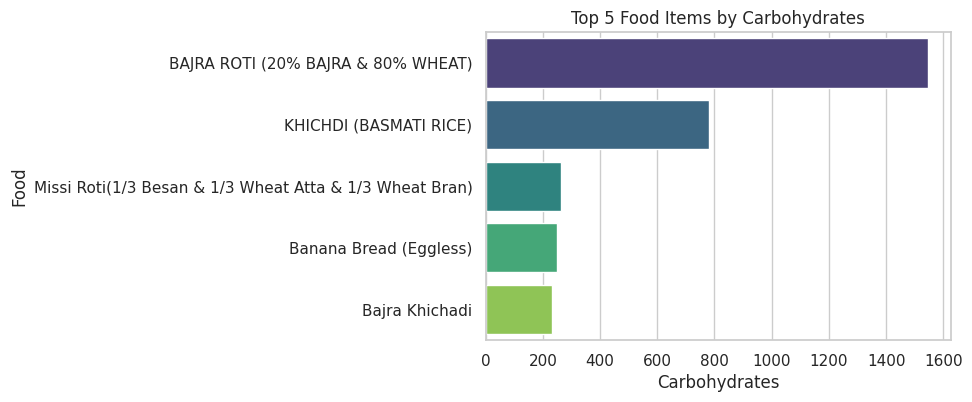

In [57]:
# Top 5 high-carbohydrates items
top_carbohydrates = df.nlargest(5, 'Carbohydrates')
sns.barplot(x='Carbohydrates', y='Food', data=top_carbohydrates, palette='viridis')
plt.title("Top 5 Food Items by Carbohydrates")
plt.show()

**Key Insights:**

1. Foods primarily made with grains (wheat, rice) dominate the list, which is expected since they are carbohydrate-rich.
2. Bajra Roti’s high value suggests wheat-based mixed rotis are more carbohydrate-dense than rice-based dishes.
3. Bajra Khichadi, although containing Bajra, has a lower carbohydrate count compared to the roti variant, likely due to portion size or inclusion of other ingredients like lentils and vegetables.

**2. Which food category contributes the most to carbon footprint?**

/tmp/ipython-input-3389960936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Carbon Footprint(kg CO2e)', data=df, estimator=np.mean, palette='viridis')


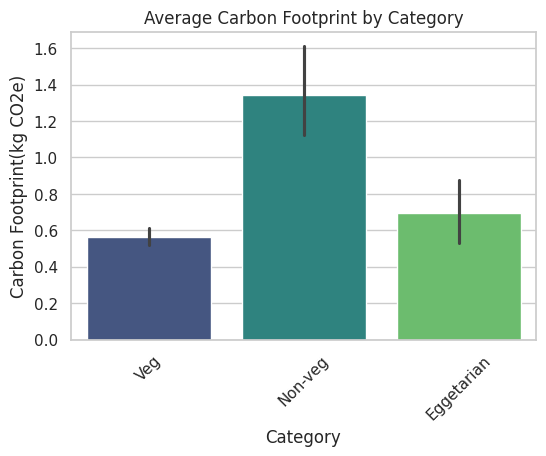

In [58]:
#food category contributing the most to carbon footprint
sns.barplot(x='Category', y='Carbon Footprint(kg CO2e)', data=df, estimator=np.mean, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Carbon Footprint by Category")
plt.show()

**Key Insights**
1. Non-Vegetarian has the highest carbon footprint: The bar for "Non-veg" is the tallest, indicating that this category has the highest average carbon footprint, at approximately 1.35 kg of CO2e.
2. Vegetarian has the lowest carbon footprint: The "Veg" bar is the shortest, showing that this category has the lowest average carbon footprint, at around 0.55 kg of CO2e.
3. Eggetarian is in the middle: The "Eggetarian" category has a carbon footprint of about 0.70 kg of CO2e, which is lower than Non-veg but higher than Veg.

**3. How are Energy, Proteins, Carbohydrates, and Fats related?**

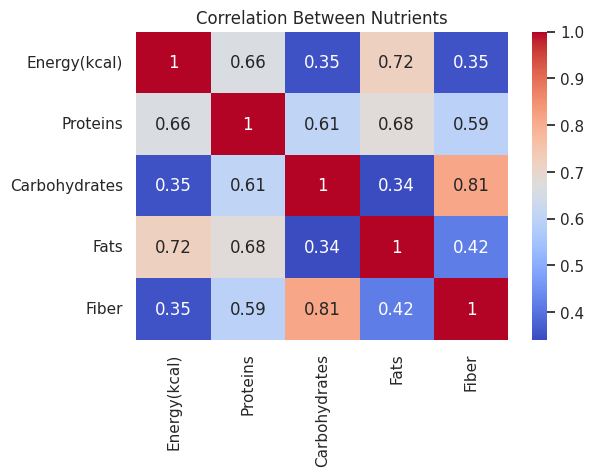

In [59]:
# Correlation heatmap for nutrient columns.
nutrient_cols = ['Energy(kcal)', 'Proteins', 'Carbohydrates', 'Fats', 'Fiber']
sns.heatmap(df[nutrient_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Nutrients")
plt.show()

**Key Insights**
1. Strong Positive Correlation:

Carbohydrates and Fiber: There is a very strong relationship, meaning as carbohydrate content increases, so does fiber.

Fats and Energy (kcal): A strong link exists, indicating that higher fat content leads to higher calorie count.

2. Moderate Positive Correlation:

Proteins and Energy (kcal): There is a clear relationship, where more protein corresponds to more energy.

Proteins and Fats: A moderate link suggests that foods high in protein often also contain significant fat.

3. Weak Correlation:

Fats and Carbohydrates: The relationship is weak, showing that foods high in one nutrient are not necessarily high in the other.

**4. Do fatty foods have a larger environmental impact?**

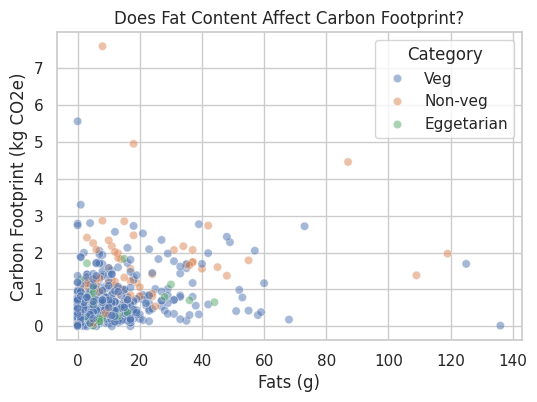

In [60]:
# Fatty foods have a larger environmental impact
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Fats', y='Carbon Footprint(kg CO2e)', hue='Category', alpha=0.5)
plt.title('Does Fat Content Affect Carbon Footprint?')
plt.xlabel('Fats (g)')
plt.ylabel('Carbon Footprint (kg CO2e)')
plt.show()

**Key Insights**

Category-Specific Observations
The most significant finding is how the three food categories are distributed across the plot:

1. Non-vegetarian (Non-veg): This category (represented by the orange points) accounts for nearly all of the food items with a high carbon footprint, many of which are above 2.0 kg of CO2e. These points are widely scattered, showing that non-vegetarian items can have varying fat content but consistently lead to the highest environmental impact.

2. Vegetarian (Veg): The blue points, representing vegetarian food, are heavily clustered in the bottom-left corner of the graph. This indicates that vegetarian items generally have both a low carbon footprint (mostly below 2.0 kg of CO2e) and low fat content. While there are a few vegetarian outliers with higher fat content, their carbon footprint remains relatively low.

3. Eggetarian: The green points for eggetarian food are also concentrated in the lower part of the graph, falling between the vegetarian and non-vegetarian clusters. This suggests that eggetarian items typically have a low to moderate carbon footprint, similar to vegetarian meals but with a slightly wider range.

**5. What is the Fiber vs Protein by Food Category?**

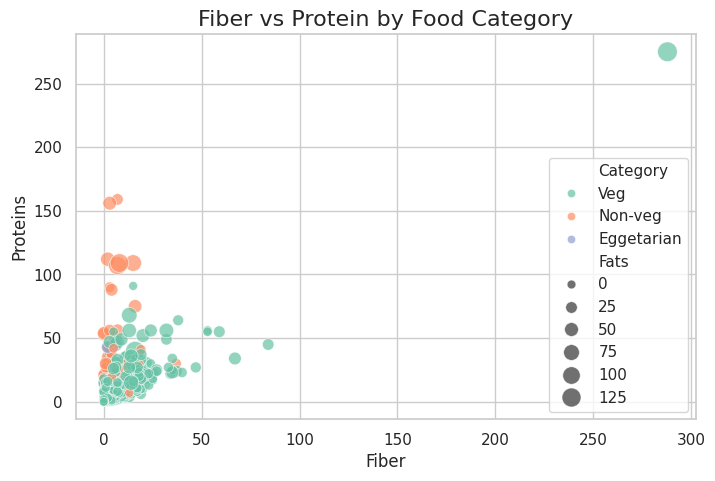

In [53]:
# Fiber vs Protein by Food Category
plt.figure(figsize=(8,5))
sns.scatterplot(x='Fiber', y='Proteins', hue='Category', size='Fats',
                palette='Set2', data=df, sizes=(40,200), alpha=0.7)
plt.title('Fiber vs Protein by Food Category', fontsize=16)
plt.xlabel('Fiber')
plt.ylabel('Proteins')
plt.show()

**Key Insights**
Overall Relationship: There is no clear, strong correlation between fiber and protein content across all food categories. The data points are scattered widely, suggesting that foods high in one nutrient are not necessarily high in the other.

1. Non-vegetarian (Non-veg) Foods: The orange data points, representing non-vegetarian foods, are generally clustered on the left side of the chart. This indicates that these foods are high in protein but low in fiber, which is expected as animal products contain protein but no dietary fiber. The size of the bubbles indicates fat content. The non-vegetarian points show a wide range of fat content, with some having very high fat levels.

2. Vegetarian (Veg) Foods: The green data points, representing vegetarian foods, are spread across the bottom and right of the plot. This shows a high variability in both fiber and protein. However, a significant number of vegetarian foods are the only ones with high fiber content, particularly the outlier in the top-right corner, which is exceptionally high in both fiber and protein.

3. Eggetarian Foods: The blue data points are concentrated in the lower-left corner of the chart. This suggests that eggetarian foods tend to have low-to-moderate levels of both fiber and protein.

The plot effectively illustrates that food category is a better predictor of nutrient profile than a simple correlation between fiber and protein. Vegetarian foods are the primary source of high fiber, while non-vegetarian foods are the main source of high protein with virtually no fiber.